In [19]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [30]:
filename = 'solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    irrddf05 = pd.read_sql('''select * from imeter_minutely''', con=con)
    tempdf05 = pd.read_sql('''select * from tmeter_minutely''', con=con)
irrddf05.LoggedDatetime = pd.to_datetime(irrddf05.LoggedDatetime) # datetime的部份，需先做過一次轉換
tempdf05.LoggedDatetime = pd.to_datetime(tempdf05.LoggedDatetime) # datetime的部份，需先做過一次轉換


In [31]:
irrddf05.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value', 'AccValue'], dtype='object')

In [32]:
tempdf05.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value'], dtype='object')

Text(0.5, 1.0, 'Temperature')

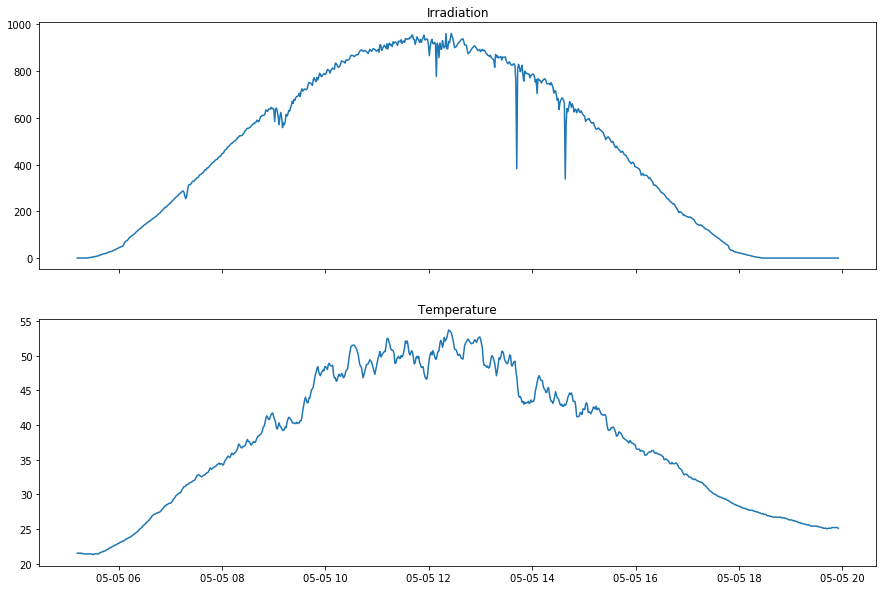

In [33]:
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(irrddf05.LoggedDatetime, irrddf05.Value)
ax[0].set_title('Irradiation')
ax[1].plot(tempdf05.LoggedDatetime, tempdf05.Value)
ax[1].set_title('Temperature')

In [34]:
irrddf05.describe()

,UniqueID,DeviceID,Value
count,812.000000,812.0,812.000000
mean,406.500000,249.0,454.612069
std,234.548502,0.0,332.462091
min,1.000000,249.0,0.000000
25%,203.750000,249.0,122.000000
50%,406.500000,249.0,472.000000
75%,609.250000,249.0,777.250000
max,812.000000,249.0,961.000000


In [51]:
mu    = irrddf05['Value'].mean()
sigma = irrddf05['Value'].std()
print(mu); print(sigma);
zirrd_value = (irrddf05.Value - mu)/sigma
zirrd_value

454.61206896551727
332.46209058938973


0     -1.36741
1     -1.36741
2     -1.36741
3     -1.36741
4     -1.36741
        ...   
807   -1.36741
808   -1.36741
809   -1.36741
810   -1.36741
811   -1.36741
Name: Value, Length: 812, dtype: float64

In [52]:
mu    = tempdf05['Value'].mean()
sigma = tempdf05['Value'].std()
print(mu); print(sigma);
ztemp_value = (tempdf05.Value - mu)/sigma
ztemp_value

37.2637931034483
9.351651477039571


0     -1.685669
1     -1.685669
2     -1.685669
3     -1.685669
4     -1.685669
         ...   
807   -1.290017
808   -1.290017
809   -1.290017
810   -1.290017
811   -1.300711
Name: Value, Length: 812, dtype: float64

Text(0.5, 1.0, 'Temperature')

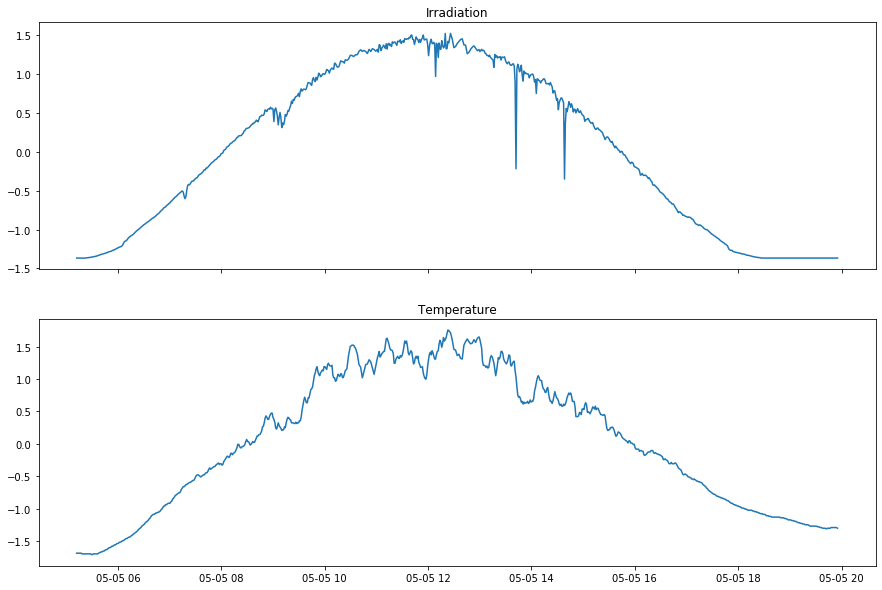

In [53]:
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(irrddf05.LoggedDatetime, zirrd_value)
ax[0].set_title('Irradiation')
ax[1].plot(irrddf05.LoggedDatetime, ztemp_value)
ax[1].set_title('Temperature')
